# Milestone 01
# Peter Lorenz

## 0. Preliminaries

Import the required libraries:

In [29]:
import sys

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from imblearn.over_sampling import SMOTE

C:\Users\Pete\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Pete\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Pete\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in ve

Set global options:

In [3]:
# Display plots inline
%matplotlib inline

# Display multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Suppress scientific notation
np.set_printoptions(suppress=True)
np.set_printoptions(precision=3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Do not truncate numpy arrays
np.set_printoptions(threshold=sys.maxsize)

Declare utility functions:

In [4]:
# Display kernel density plot for the given column with options
def show_kde_plot(df, col, axis):
    # Compute rough bandwidth "factor" from range
    bandwidth = np.ptp(df[col]) / 50

    # Display plot and labels
    sns.kdeplot(df.loc[:, col], ax = axis, bw = bandwidth)
    axis.set_xlabel(col) # Set text for the x axis
    axis.set_ylabel('Density')# Set text for y axis

## 1. Refine data understanding / Prepare DFD of solving the manufacturing quality problem
In this section we refine our understanding of the data and prepare a dataflow diagram that describes a potential solution to the manufacturing quality problem.

## 2. Read and merge data
First we import the sensor data set and its accompanying labels, generating column names as necessary for convenient reference to specific features:

In [5]:
# Internet location of the data set and labels
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data"
labels_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data"

# Download sensor data and labels into a dataframe object, specify python engine for regex
sensor_data = pd.read_csv(url, sep='\s{1,}', engine='python')
sensor_labels_data = pd.read_csv(labels_url, sep='\s{1,}', engine='python')

# Generate index-based column names for the sensor data set
sensor_data.columns = list('s' + str(idx + 1) for idx in range(0, sensor_data.shape[1]))

# Assign column names to the labels
sensor_labels_data.columns = ['result', 'date', 'time']

# Save the original data frame for future reference as we modify its contents
sensor_data_orig = sensor_data

# Display shape and initial values of the sensor data set
print('Sensor data set:')
sensor_data.shape
sensor_data.head()

# Display shape and data for labels
print('Sensor labels:')
sensor_labels_data.shape
sensor_labels_data.head()

Sensor data set:


(1566, 590)

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s581,s582,s583,s584,s585,s586,s587,s588,s589,s590
0,3095.780,2465.140,2230.422,1463.661,0.829,100.000,102.343,0.125,1.497,-0.001,...,0.006,208.204,0.502,0.022,0.005,4.445,0.010,0.020,0.006,208.204
1,2932.610,2559.940,2186.411,1698.017,1.510,100.000,95.488,0.124,1.444,0.004,...,0.015,82.860,0.496,0.016,0.004,3.175,0.058,0.048,0.015,82.860
2,2988.720,2479.900,2199.033,909.793,1.320,100.000,104.237,0.122,1.488,-0.012,...,0.004,73.843,0.499,0.010,0.003,2.054,0.020,0.015,0.004,73.843
3,3032.240,2502.870,2233.367,1326.520,1.533,100.000,100.397,0.123,1.503,-0.003,...,nan,nan,0.480,0.477,0.104,99.303,0.020,0.015,0.004,73.843
4,2946.250,2432.840,2233.367,1326.520,1.533,100.000,100.397,0.123,1.529,0.017,...,0.005,44.008,0.495,0.019,0.004,3.828,0.034,0.015,0.005,44.008


Sensor labels:


(1566, 3)

,result,date,time
0,-1,"""19/07/2008","12:32:00"""
1,1,"""19/07/2008","13:17:00"""
2,-1,"""19/07/2008","14:43:00"""
3,-1,"""19/07/2008","15:22:00"""
4,-1,"""19/07/2008","17:53:00"""


## 3. Clean and prepare data
We begin by examining the data types:

In [196]:
# List columns with data types
sensor_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1566 entries, 0 to 1565
Data columns (total 590 columns):
 #   Column  Dtype  
---  ------  -----  
 0   s1      float64
 1   s2      float64
 2   s3      float64
 3   s4      float64
 4   s5      float64
 5   s6      float64
 6   s7      float64
 7   s8      float64
 8   s9      float64
 9   s10     float64
 10  s11     float64
 11  s12     float64
 12  s13     float64
 13  s14     float64
 14  s15     float64
 15  s16     float64
 16  s17     float64
 17  s18     float64
 18  s19     float64
 19  s20     float64
 20  s21     float64
 21  s22     float64
 22  s23     float64
 23  s24     float64
 24  s25     float64
 25  s26     float64
 26  s27     float64
 27  s28     float64
 28  s29     float64
 29  s30     float64
 30  s31     float64
 31  s32     float64
 32  s33     float64
 33  s34     float64
 34  s35     float64
 35  s36     float64
 36  s37     float64
 37  s38     float64
 38  s39     float64
 39  s40     float64
 40  s41  

All of the columns are float64, so there are no categorical columns to one-hot encode and no casting is needed.
### Remove columns with too many NaN's
Now we look for missing data by finding the number of columns containing at least one NaN:

In [6]:
# Display number of columns with NaN in sensor data set
print("Number of columns with NaN:", len(sensor_data.columns[sensor_data.isna().any()]))

Number of columns with NaN: 534



Most columns have at least one NaN. What we must decide is at what point to drop a column because it has too much missing data, balancing the cost of dropping columns against the cost of having columns with a significant proportion of imputed values. For a sense of the extent of the problem, we count the number of columns with greater than 5% and 10% NaN's respectively:

In [7]:
# Count NaN's per column
df_na = sensor_data.isna().sum()

# Identify and display columns above various cutoff percentages of NaN's
nan_1_pct = df_na[df_na > 0.01 * sensor_data.shape[0]]
nan_3_pct = df_na[df_na > 0.03 * sensor_data.shape[0]]
nan_5_pct = df_na[df_na > 0.05 * sensor_data.shape[0]]
nan_10_pct = df_na[df_na > 0.1 * sensor_data.shape[0]]
nan_20_pct = df_na[df_na > 0.2 * sensor_data.shape[0]]

print(nan_1_pct.shape[0], 'columns are more than 1% NaN')
print(nan_3_pct.shape[0], 'columns are more than 3% NaN')
print(nan_5_pct.shape[0], 'columns are more than 5% NaN')
print(nan_10_pct.shape[0], 'columns are more than 10% NaN')
print(nan_20_pct.shape[0], 'columns are more than 20% NaN')

103 columns are more than 1% NaN
60 columns are more than 3% NaN
52 columns are more than 5% NaN
52 columns are more than 10% NaN
32 columns are more than 20% NaN


There seems to be a space between 3% and 20% that separates columns with a manageable proportion of NaN's and columns where imputing NaN's might be expected to impact the results. So we drop the 52 columns 6% or more of whose values are NaN:

In [8]:
# Drop columns with more than 5% NaN's
sensor_data = sensor_data.drop(list(nan_5_pct.index), axis=1)
sensor_data.shape

(1566, 538)

We can see that 52 columns were dropped, leaving 538 columns in the dataframe:

In [9]:
# Display status after dropping zero-variance columns
print('Number of columns dropped:', nan_5_pct.shape[0])
print('Columns retained in data frame:', len(sensor_data.columns))

Number of columns dropped: 52
Columns retained in data frame: 538


### Impute fields with Nan in remaining columns
We now impute missing values in the remaining NaN columns using the median value of the column:

In [10]:
# Impute and replace missing values using column median
sensor_data = sensor_data.replace('?', np.NaN).apply(lambda x: x.fillna(x.median()))

# Verify imputation of missing values
print("Number of columns with NaN:", len(sensor_data.columns[sensor_data.isna().any()]))

Number of columns with NaN: 0


Our data set is now free of missing values that were initially encoded as NaN.
### Remove columns with zero variance
Another problem in the data set is features whose variance is zero, i.e. they have the same value in every row. This problem became apparent when I attempted to run seaborn's kdeplot function and received the warning: "Data must have variance to compute a kernel density estimate." So another step in cleaning the data is to drop columns with zero variance. Many of these columns are all zeros, though some have other constant values (e.g. s6 == 100). To address this, we identify and drop columns whose variance is zero:

In [11]:
# Display columns with zero variance
zero_variance_cols = np.array(sensor_data.columns[sensor_data.var() == 0])
zero_variance_cols

# Drop columns with zero variance
sensor_data = sensor_data.drop(zero_variance_cols, axis=1)

array(['s6', 's14', 's43', 's50', 's53', 's70', 's98', 's142', 's150',
       's179', 's180', 's187', 's190', 's191', 's192', 's193', 's194',
       's195', 's227', 's230', 's231', 's232', 's233', 's234', 's235',
       's236', 's237', 's238', 's241', 's242', 's243', 's244', 's257',
       's258', 's259', 's260', 's261', 's262', 's263', 's264', 's265',
       's266', 's267', 's277', 's285', 's314', 's315', 's316', 's323',
       's326', 's327', 's328', 's329', 's330', 's331', 's365', 's370',
       's371', 's372', 's373', 's374', 's375', 's376', 's379', 's380',
       's381', 's382', 's395', 's396', 's397', 's398', 's399', 's400',
       's401', 's402', 's403', 's404', 's405', 's415', 's423', 's450',
       's451', 's452', 's459', 's462', 's463', 's464', 's465', 's466',
       's467', 's482', 's499', 's502', 's503', 's504', 's505', 's506',
       's507', 's508', 's509', 's510', 's513', 's514', 's515', 's516',
       's529', 's530', 's531', 's532', 's533', 's534', 's535', 's536',
      

We can see that 116 columns were dropped, leaving 422 columns in the dataframe:

In [12]:
# Display status after dropping zero-variance columns
print('Number of columns dropped:', len(zero_variance_cols))
print('Columns retained in data frame:', len(sensor_data.columns))

Number of columns dropped: 116
Columns retained in data frame: 422


### Remove columns with substantial percentage of zeros
Another form missing values can take is columns that primarily consist of zeros. As we did with NaN's, let's find the number columns consisting of various percentages of zeros:

In [13]:
# Count zeroes per column
zero_counts = sensor_data[sensor_data == 0].count(axis=0)

# Identify and display columns above various cutoff percentages of zeros
zero_1_pct = zero_counts[zero_counts > 0.01 * sensor_data.shape[0]]
zero_3_pct = zero_counts[zero_counts > 0.03 * sensor_data.shape[0]]
zero_5_pct = zero_counts[zero_counts > 0.05 * sensor_data.shape[0]]
zero_10_pct = zero_counts[zero_counts > 0.1 * sensor_data.shape[0]]
zero_20_pct = zero_counts[zero_counts > 0.2 * sensor_data.shape[0]]

print(zero_1_pct.shape[0], 'columns are more than 1% zeros')
print(zero_3_pct.shape[0], 'columns are more than 3% zeros')
print(zero_5_pct.shape[0], 'columns are more than 5% zeros')
print(zero_10_pct.shape[0], 'columns are more than 10% zeros')
print(zero_20_pct.shape[0], 'columns are more than 20% zeros')

46 columns are more than 1% zeros
43 columns are more than 3% zeros
33 columns are more than 5% zeros
29 columns are more than 10% zeros
21 columns are more than 20% zeros


Since it is possible that zero is a legitimate value in many cases (unlike NaN), we take a more conservative approach, discarding columns that are more than 20% zeros:

In [14]:
# Drop columns with more than 20% zeros
sensor_data = sensor_data.drop(list(zero_20_pct.index), axis=1)
sensor_data.shape

(1566, 401)

We can see that 21 columns were dropped, leaving 401 columns in the dataframe:

In [15]:
# Display status after dropping zero-variance columns
print('Number of columns dropped:', zero_20_pct.shape[0])
print('Columns retained in data frame:', len(sensor_data.columns))

Number of columns dropped: 21
Columns retained in data frame: 401


Our data set is now free of two common forms of missing values. We also verify that the labels data is free of missing values by displaying the number of columns with missing values:

In [16]:
# Display number of columns with NaN in sensor labels
print("Number of columns with NaN:", 
      len(sensor_labels_data.columns[sensor_labels_data.isna().any()]))

Number of columns with NaN: 0


Since neither the main data set nor the labels is left with missing values, we can now proceed to data exploration.

## 4. Explore data visually
Next we explore the data visually to gain insight into how to approach creating a model. With so many features (590), the challenge of course is to display potential issues in the data and promising relationships between variables in a way that does not overwhelm the viewer.

We begin by examining the distributions of the variables, performing kernel density analysis on the remaining columns:

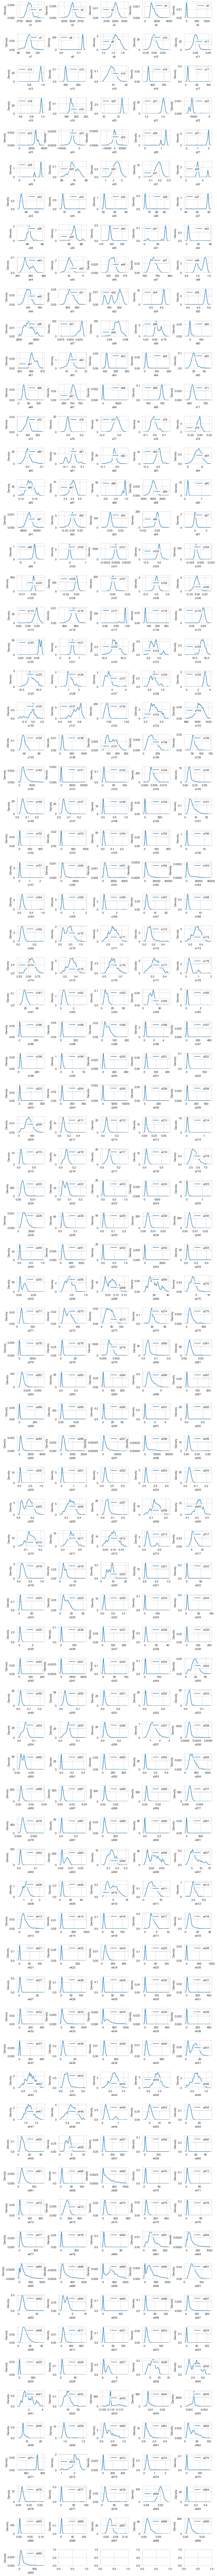

In [388]:
# Display kernel density plot for each feature
# Basically, this code divides up a subplot area based on the number of columns
# then assigns one plot to each area to fit all plots in a reasonable area
df_cols = len(sensor_data.columns)
COLS = 5
ROWS = int((df_cols - 1) / 5 + 1)
FIRST_COL = 1
LAST_COL = COLS * ROWS
fig, axes = plt.subplots(nrows=ROWS, ncols=COLS, figsize=(12, ROWS * 2))
plt.subplots_adjust(wspace=0.5, hspace=1)

cur_col = 0
for i in range(FIRST_COL, LAST_COL + 1):
    if cur_col == len(sensor_data.columns):
        break
    row = int((i - 1) / COLS)
    col = (i - 1) % COLS
    col_name = sensor_data.columns[[cur_col]][0]
    cur_col = cur_col + 1
    try:
        show_kde_plot(sensor_data, col_name, axes[row][col])
    except Exception as e:
        print('Col ', col_name, ' error, col type = ', sensor_data[col_name].values.dtype)
        print('Range of column is ', str(np.ptp(sensor_data[col_name])))
        print('Standard deviation is ', str(np.std(sensor_data[col_name])))
        print('Variance is ', str(np.var(sensor_data[col_name])))
        print(e)

Next we look at the relationships between the columns, starting with the correlation matrix:

In [44]:
corr = sensor_data.corr().round(2)
corr

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s581,s582,s583,s584,s585,s586,s587,s588,s589,s590
s1,1.000,-0.140,0.000,-0.010,-0.010,nan,0.000,0.030,-0.050,0.010,...,-0.060,-0.040,0.000,0.020,0.020,0.020,0.020,-0.030,-0.030,0.000
s2,-0.140,1.000,0.010,-0.010,-0.000,nan,-0.020,-0.010,0.030,0.020,...,0.050,0.060,0.040,0.000,-0.000,0.000,-0.010,0.020,0.010,0.040
s3,0.000,0.010,1.000,0.300,0.100,nan,-0.140,-0.150,0.020,0.020,...,-0.000,0.010,-0.010,0.020,0.020,0.020,-0.030,-0.030,-0.030,-0.030
s4,-0.010,-0.010,0.300,1.000,-0.060,nan,-0.690,0.090,-0.100,0.070,...,-0.030,-0.050,0.010,0.030,0.020,0.030,0.040,-0.040,-0.030,-0.080
s5,-0.010,-0.000,0.100,-0.060,1.000,nan,-0.070,-0.340,-0.030,0.050,...,-0.030,0.100,0.040,-0.000,-0.000,-0.000,-0.040,-0.030,-0.030,0.050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s586,0.020,0.000,0.020,0.030,-0.000,nan,-0.040,0.010,0.020,-0.040,...,0.000,0.000,-0.200,1.000,1.000,1.000,0.000,-0.000,-0.000,-0.000
s587,0.020,-0.010,-0.030,0.040,-0.040,nan,-0.040,0.060,0.010,0.030,...,0.150,-0.270,-0.020,0.000,0.000,0.000,1.000,0.170,0.160,-0.490
s588,-0.030,0.020,-0.030,-0.040,-0.030,nan,0.030,-0.020,0.020,0.060,...,0.670,0.270,-0.020,-0.000,-0.000,-0.000,0.170,1.000,0.970,0.390
s589,-0.030,0.010,-0.030,-0.030,-0.030,nan,0.030,-0.020,0.030,0.060,...,0.680,0.260,-0.020,-0.000,-0.000,-0.000,0.160,0.970,1.000,0.390


In [42]:
corr.columns[corr.isna().any()]

Index(['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10',
       ...
       's581', 's582', 's583', 's584', 's585', 's586', 's587', 's588', 's589',
       's590'],
      dtype='object', length=590)

In [45]:
corr.to_csv("corr.csv")

Is there colinearity or proxying?

Next we examine the distribution of labels using a bar plot to show the numbers of each possible result:

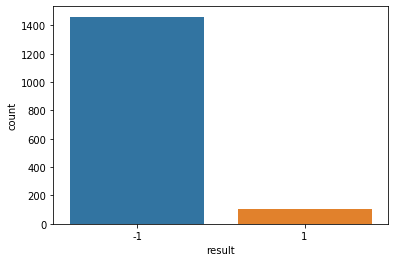

In [28]:
# Display plot of classes in the target variable
sns.countplot(x='result', data=sensor_labels_data)

It is clear we have a class imbalance problem at hand, with significantly more "negative" results (-1) than "positive" results. For every "positive" there are 14 "negatives" (104 to 1462). This is a problem we will have to handle to model the data set. Otherwise, it would be possible for the model simply to guess "negative" and be correct 93% of the time.

## 5. Handle class imbalance problem
Before proceeding we need to address the class imbalance problem inherent in the data set. One way to address the class imbalance problem is through oversampling using a library such as SMOTE.

In [30]:
# Instantiate SMOTE reference
sm = SMOTE(random_state=1)

# Apply oversampling to model data and label column
X_resample, y_resample = sm.fit_resample(sensor_data, sensor_labels_data['result'])

# Convert resampled model data to dataframe and display first rows
df_resample = pd.DataFrame(X_resample, columns=sensor_data.columns)
df_resample.head()

# Convert labels array to dataframe
df_labels_resample = pd.DataFrame(y_resample, columns=['result'])

C:\Users\Pete\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


,s1,s2,s3,s4,s5,s7,s8,s9,s10,s11,...,s577,s578,s583,s584,s585,s586,s587,s588,s589,s590
0,3095.780,2465.140,2230.422,1463.661,0.829,102.343,0.125,1.497,-0.001,-0.015,...,1.107,10.900,0.502,0.022,0.005,4.445,0.010,0.020,0.006,208.204
1,2932.610,2559.940,2186.411,1698.017,1.510,95.488,0.124,1.444,0.004,0.001,...,2.095,9.272,0.496,0.016,0.004,3.175,0.058,0.048,0.015,82.860
2,2988.720,2479.900,2199.033,909.793,1.320,104.237,0.122,1.488,-0.012,-0.003,...,1.758,8.583,0.499,0.010,0.003,2.054,0.020,0.015,0.004,73.843
3,3032.240,2502.870,2233.367,1326.520,1.533,100.397,0.123,1.503,-0.003,-0.007,...,1.660,10.970,0.480,0.477,0.104,99.303,0.020,0.015,0.004,73.843
4,2946.250,2432.840,2233.367,1326.520,1.533,100.397,0.123,1.529,0.017,0.005,...,1.668,13.775,0.495,0.019,0.004,3.828,0.034,0.015,0.005,44.008


Let's see how many rows are now in the data set:

In [31]:
df_resample["s1"].count()

2924

There are now 2924 rows in the data set compared to the 1566 in the original data set. If we examine the distribution of labels, we see a big difference:

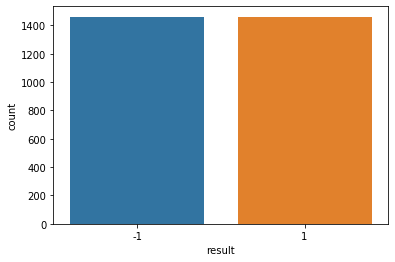

In [35]:
# Display plot of classes in the target variable
sns.countplot(x='result', data=df_labels_resample)

Now there are equal numbers of "positive" and "negative" results. We may now proceed with feature selection.

## 6. Apply feature selection techniques to reduce dimensionality of data
Here we apply feature selection techniques to reduce the dimensionality of data.

## Conclusions
In lieu of final conclusions we discuss what we have accomplished thus far and the rationale for the various steps we have implemented in preparation for creating a model.